# ***REGRESSION AND ITS EVALUATION ASSIGNMENT:-***

1.  What is Simple Linear Regression?

  ANS:- Simple Linear Regression is a statistical method used to model the relationship between two variables :-
  
  one independent (predictor) and one dependent (response). It assumes a straight-line relationship expressed as $Y=\beta _0+\beta _1X+\epsilon$ , where ᵝ0 is the intercept, ᵝ1 is the slope, and ᵋ is the error term. The goal is to estimate parameters that minimize prediction errors, allowing us to understand, predict, or quantify how changes in X affect Y.


2. What are the key assumptions of Simple Linear Regression?

    ANS:- The key assumptions of Simple Linear Regression are:
    
    - **Linearity:** The relationship between predictor and response is linear.

    - **Independence:** Residuals are independent of each other.

    - **Homoscedasticity:** Residuals have constant variance across all values of the predictor.

    - **Normality:** Residuals follow a normal distribution.

    These assumptions ensure unbiased estimates, valid hypothesis testing, and reliable predictions. Violations can lead to misleading results, so analysts check them before trusting regression outcomes.


3. What is heteroscedasticity, and why is it important to address in regression
models?

    ANS:- Heteroscedasticity occurs when the variance of residuals is not constant across values of the predictor. Instead of equal spread, errors grow or shrink with X. This violates regression's homoscedasticity assumption.
    
    It matters because unequal variance makes coefficient estimates inefficient, distorts standard errors, and invalidates hypothesis tests. As a result, confidence intervals and p-values become unreliable. Addressing heteroscedasticity ensures accurate inference, valid predictions, and trustworthy conclusions in regression analysis.


4.  What is Multiple Linear Regression?

ANS:- Multiple Linear Regression is a method that explains how a dependent variable relates to several independent variables simultaneously. It generalizes simple regression by fitting a linear equation with multiple predictors.

The model is expressed as

$Y=\beta _0+\beta _1X_1+\beta _2X_2+\dots +\beta _nX_n+\epsilon$

Each coefficient shows the unique contribution of its predictor while controlling for others. This helps analyze complex systems, quantify influences, and improve prediction accuracy compared to single-variable models.


5. What is polynomial regression, and how does it differ from linear
regression?

  ANS:- Polynomial regression is a regression technique where the relationship between independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.
  
  The equation takes the form:
  
  $Y=\beta _0+\beta _1X+\beta _2X^2+\dots +\beta _nX^n+\epsilon$
  
  Unlike simple linear regression, which fits a straight line, polynomial regression fits curves to capture nonlinear patterns. The key difference is that polynomial regression can model complex, curved relationships, while linear regression assumes a strictly straight-line relationship.


6.   Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

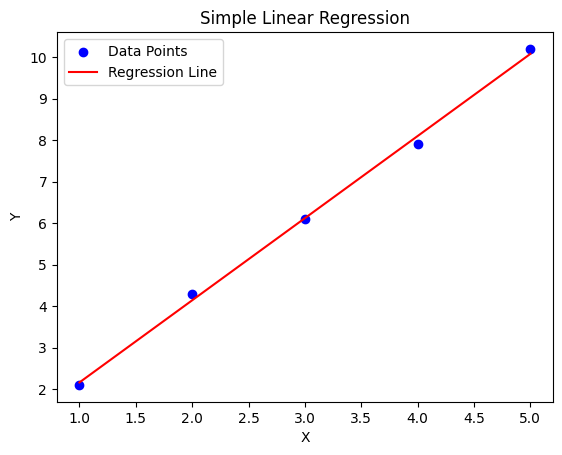

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit model

model = LinearRegression()
model.fit(X, Y)

# Predictions

Y_pred = model.predict(X)

# Plot data points

plt.scatter(X, Y, color='blue', label='Data Points')

# Plot regression line

plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Print coefficients

print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

7. Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]


Check for multicollinearity using VIF and report the results.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame

df = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# Independent variables

X = df[['Area', 'Rooms']]
X_const = sm.add_constant(X)

# Dependent variable

Y = df['Price']

# Fit model

model = sm.OLS(Y, X_const).fit()
print(model.summary())

# Calculate VIF

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 17 Dec 2025   Prob (F-statistic):             0.0377
Time:                        11:35:08   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


8.  Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

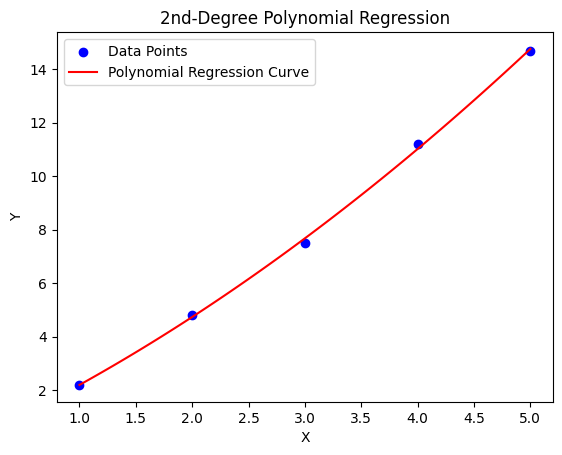

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features for polynomial regression (degree=2)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model

model = LinearRegression()
model.fit(X_poly, Y)

# Predictions

X_range = np.linspace(1, 5, 100).reshape(-1, 1)
Y_pred = model.predict(poly.transform(X_range))

# Plot data points

plt.scatter(X, Y, color='blue', label='Data Points')

# Plot polynomial regression curve

plt.plot(X_range, Y_pred, color='red', label='Polynomial Regression Curve')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.show()

# Output coefficients

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

9. Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

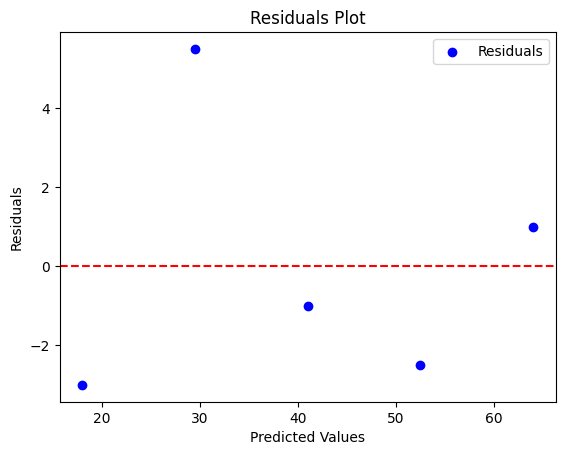

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit regression model

model = LinearRegression()
model.fit(X, Y)

# Predictions

Y_pred = model.predict(X)

# Residuals

residuals = Y - Y_pred

# Plot residuals vs predicted values

plt.scatter(Y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

# Print residuals

print("Residuals:", residuals)

10.  Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

  **ANS :-**   
**Step 1 :** Diagnose the problems
    
- Heteroscedasticity → Residual plots, Breusch-Pagan or White test to confirm variance changes with predictors.
- Multicollinearity → Variance Inflation Factor (VIF), correlation matrix; VIF > 5-10 indicates trouble.

**Step 2 :** Address heteroscedasticity
- Transform target or predictors: e.g., log(price), square-root(area) to stabilize variance.
- Weighted Least Squares (WLS): weight observations inversely to variance.
- Robust regression / robust standard errors: ensures valid inference even if variance isn't constant.

**Step 3 :** Address multicollinearity
- Feature selection or combination: drop redundant predictors or create ratios (rooms per area).
- Regularization:
- Ridge regression shrinks correlated coefficients.
- Lasso regression performs variable selection.
- Dimensionality reduction: Principal Component Regression (PCR) or Partial Least Squares (PLS) to create orthogonal predictors.

**Step 4 :** Validate robustness
- Cross-validation: check predictive stability across folds.
- Bootstrap: assess coefficient stability under resampling.
- Residual diagnostics: ensure variance is stabilized and predictors are interpretable

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Example dataset

data = pd.DataFrame({
    'area': [1200, 1500, 1700, 2000, 2500, 3000],
    'rooms': [3, 4, 4, 5, 5, 6],
    'location_score': [7, 8, 8, 9, 9, 10],
    'price': [200000, 250000, 270000, 320000, 400000, 480000]
})

X = data[['area', 'rooms', 'location_score']]
y = data['price']

# Step 1: OLS regression

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

# Step 2: Test for heteroscedasticity

bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
print(dict(zip(labels, bp_test)))

#  Step 3: Check multicollinearity (VIF)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#  Step 4: Fix heteroscedasticity (log-transform target)

y_log = np.log(y)
ols_model_log = sm.OLS(y_log, X_const).fit()
print(ols_model_log.summary())

#  Step 5: Fix multicollinearity with Ridge/Lasso
# Use full dataset directly for CV (since only 6 rows)

ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, cv=3, scoring='r2')
print("Ridge CV R2:", ridge_scores.mean())

lasso = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso, X, y, cv=3, scoring='r2')
print("Lasso CV R2:", lasso_scores.mean())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1068.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           5.26e-05
Time:                        12:10:17   Log-Likelihood:                -57.557
No. Observations:                   6   AIC:                             121.1
Df Residuals:                       3   BIC:                             120.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1476.7025   2981.967      0.

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
